Problem Statement

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/Users/rahulkp/Downloads/archive/Musical_instruments_reviews.csv')
df

reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
...               ...         ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC   
10257   A1RPTVW5VEOSI  B00JBIVXGC   
10258   AWCJ12KBO5VII  B00JBIVXGC   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC   
10260  A2WA8TDCTGUADI  B00JBIVXGC   

                                           reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   Lonnie M. Adams    [0, 0]   
10257                                Michael J. Edelman    [0, 0]   
10258                                  Michael L. Knapp    [0, 0]   
10259                           Rick Langdon "Scriptor"    [0, 0]   
10260                                   TheTerrorBeyond    [0, 0]   

                                              reviewText  overall  \
0      Not much to write about here, but it does exac...      5.0   
1      The product does exactly as it should and is q...      5.0   
2      The primary job of this device is to block the...      5.0   
3      Nice windscreen protects my MXL mic and preven...      5.0   
4      This pop filter is great. It looks and perform...      5.0   
...                                                  ...      ...   
10256            Great, just as expected.  Thank to all.      5.0   
10257  I've been thinking about trying the Nanoweb st...      5.0   
10258  I have tried coated strings in the past ( incl...      4.0   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...      4.0   
10260  These strings are really quite good, but I wou...      4.0   

                                                 summary  unixReviewTime  \
0                                                   good      1393545600   
1                                                   Jake      1363392000   
2                                   It Does The Job Well      1377648000   
3                          GOOD WINDSCREEN FOR THE MONEY      1392336000   
4                  No more pops when I record my vocals.      1392940800   
...                                                  ...             ...   
10256                                         Five Stars      1405814400   
10257  Long life, and for some players, a good econom...      1404259200   
10258                                   Good for coated.      1405987200   
10259                                        Taylor Made      1404172800   
10260  These strings are really quite good, but I wou...      1405468800   

        reviewTime  
0      02 28, 2014  
1      03 16, 2013  
2      08 28, 2013  
3      02 14, 2014  
4      02 21, 2014  
...            ...  
10256  07 20, 2014  
10257   07 2, 2014  
10258  07 22, 2014  
10259   07 1, 2014  
10260  07 16, 2014  

[10261 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [4]:
df.shape

(10261, 9)

In [54]:
data=df[['reviewText','overall']].sample(1200,random_state=20)
data

reviewText  overall
2702  Planet Waves makes good stuff.  Take the load ...      5.0
5055  Overall dimensions 6 3/4" x 6 1/2" x 2 1/4". V...      3.0
6195  I've had this for 4 days and I'm so glad I bou...      5.0
476   Sounds like my original.  Enough said.  Great ...      5.0
3893  I bought two of these for my band, and they ar...      5.0
...                                                 ...      ...
3125  Fender guitars are made for tinkering -- they ...      5.0
880   First, I love these picks and used them exclus...      3.0
329   Great,great sound. The sound of these strings ...      5.0
9868  Depends on what your looking for. Is this a PO...      5.0
4938  What can I say that you haven't already read a...      5.0

[1200 rows x 2 columns]

In [ ]:
#data=df.rename({'reviewText':'REVIEW','overall':'RATING'},axis=1,inplace=True)
#data

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 2702 to 4938
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  1199 non-null   object 
 1   overall     1200 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.1+ KB


In [56]:
# drop missing values
data.isnull().sum()

reviewText    1
overall       0
dtype: int64

In [57]:
data.dropna(inplace=True)

In [58]:
data

reviewText  overall
2702  Planet Waves makes good stuff.  Take the load ...      5.0
5055  Overall dimensions 6 3/4" x 6 1/2" x 2 1/4". V...      3.0
6195  I've had this for 4 days and I'm so glad I bou...      5.0
476   Sounds like my original.  Enough said.  Great ...      5.0
3893  I bought two of these for my band, and they ar...      5.0
...                                                 ...      ...
3125  Fender guitars are made for tinkering -- they ...      5.0
880   First, I love these picks and used them exclus...      3.0
329   Great,great sound. The sound of these strings ...      5.0
9868  Depends on what your looking for. Is this a PO...      5.0
4938  What can I say that you haven't already read a...      5.0

[1199 rows x 2 columns]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 2702 to 4938
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  1199 non-null   object 
 1   overall     1199 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.1+ KB


In [60]:
data.describe()

overall
count  1199.000000
mean      4.481234
std       0.913325
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

In [61]:
data['overall'].value_counts().sort_index(ascending=False)

5.0    813
4.0    235
3.0     95
2.0     27
1.0     29
Name: overall, dtype: int64

/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


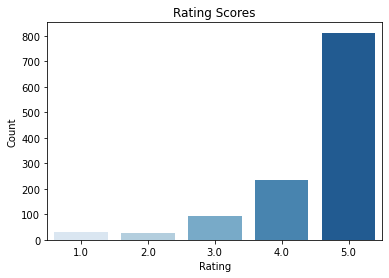

In [62]:
# distribution of rating
import seaborn as sns
sns.countplot(data['overall'], palette='Blues')

import matplotlib.pyplot as plt
plt.title('Rating Scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Text Preprocessing

In [63]:
data=[reviewText.strip()for reviewText in data.reviewText] # remove both the leading and the trailing characters
data=[reviewText for reviewText in data if reviewText] # removes empty strings, because they are considered in Python as False
data[0:20]

["Planet Waves makes good stuff.  Take the load off your shoulder from that old Jazz bass, and get a padded 3 inch wide strap. It's long enough to allow my bass to rest at arm's length.  I can adjust it to fit my acoustic guitar, which I hold much higher, and check out the little 'pick-pocket'.  I like these well enough that I have four of them.",
 'Overall dimensions 6 3/4" x 6 1/2" x 2 1/4". Very nice travel size. Sound is about what you would expect. It is basically a toy. If you use more than 2 (of 10 max) gain, it sounds awful. I turn guitar volume to max and adjust volume on the amp to desired level. Tone works nicely to filter the output over all frequencies. I am using it with a Fender Starcaster when I travel for work (hotel friendly). I think it\'s over priced but I think it looks good and it seems durable.',
 "I've had this for 4 days and I'm so glad I bought it. Its basically a top end 2 second delay with whistles and bells you wouldn't even think they would be on there. I 

In [68]:
# Joining the list into one string/text
data_text=' '.join(data)
data_text

'Planet Waves makes good stuff.  Take the load off your shoulder from that old Jazz bass, and get a padded 3 inch wide strap. It\'s long enough to allow my bass to rest at arm\'s length.  I can adjust it to fit my acoustic guitar, which I hold much higher, and check out the little \'pick-pocket\'.  I like these well enough that I have four of them. Overall dimensions 6 3/4" x 6 1/2" x 2 1/4". Very nice travel size. Sound is about what you would expect. It is basically a toy. If you use more than 2 (of 10 max) gain, it sounds awful. I turn guitar volume to max and adjust volume on the amp to desired level. Tone works nicely to filter the output over all frequencies. I am using it with a Fender Starcaster when I travel for work (hotel friendly). I think it\'s over priced but I think it looks good and it seems durable. I\'ve had this for 4 days and I\'m so glad I bought it. Its basically a top end 2 second delay with whistles and bells you wouldn\'t even think they would be on there. I ha

In [69]:
# Remove Punctuations 
import string
no_pun_data=data_text.translate(str.maketrans('','',string.punctuation))
no_pun_data

'Planet Waves makes good stuff  Take the load off your shoulder from that old Jazz bass and get a padded 3 inch wide strap Its long enough to allow my bass to rest at arms length  I can adjust it to fit my acoustic guitar which I hold much higher and check out the little pickpocket  I like these well enough that I have four of them Overall dimensions 6 34 x 6 12 x 2 14 Very nice travel size Sound is about what you would expect It is basically a toy If you use more than 2 of 10 max gain it sounds awful I turn guitar volume to max and adjust volume on the amp to desired level Tone works nicely to filter the output over all frequencies I am using it with a Fender Starcaster when I travel for work hotel friendly I think its over priced but I think it looks good and it seems durable Ive had this for 4 days and Im so glad I bought it Its basically a top end 2 second delay with whistles and bells you wouldnt even think they would be on there I have had ALOT of delay pedals and this thing is l

In [70]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/rahulkp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulkp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_pun_data)
print(text_tokens[0:100])

['Planet', 'Waves', 'makes', 'good', 'stuff', 'Take', 'the', 'load', 'off', 'your', 'shoulder', 'from', 'that', 'old', 'Jazz', 'bass', 'and', 'get', 'a', 'padded', '3', 'inch', 'wide', 'strap', 'Its', 'long', 'enough', 'to', 'allow', 'my', 'bass', 'to', 'rest', 'at', 'arms', 'length', 'I', 'can', 'adjust', 'it', 'to', 'fit', 'my', 'acoustic', 'guitar', 'which', 'I', 'hold', 'much', 'higher', 'and', 'check', 'out', 'the', 'little', 'pickpocket', 'I', 'like', 'these', 'well', 'enough', 'that', 'I', 'have', 'four', 'of', 'them', 'Overall', 'dimensions', '6', '34', 'x', '6', '12', 'x', '2', '14', 'Very', 'nice', 'travel', 'size', 'Sound', 'is', 'about', 'what', 'you', 'would', 'expect', 'It', 'is', 'basically', 'a', 'toy', 'If', 'you', 'use', 'more', 'than', '2', 'of']


In [72]:
len(text_tokens)

102849

In [73]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['Planet', 'Waves', 'makes', 'good', 'stuff', 'Take', 'load', 'shoulder', 'old', 'Jazz', 'bass', 'get', 'padded', '3', 'inch', 'wide', 'strap', 'Its', 'long', 'enough', 'allow', 'bass', 'rest', 'arms', 'length', 'adjust', 'fit', 'acoustic', 'guitar', 'hold', 'much', 'higher', 'check', 'little', 'pickpocket', 'like', 'well', 'enough', 'four', 'Overall', 'dimensions', '6', '34', 'x', '6', '12', 'x', '2', '14', 'Very', 'nice', 'travel', 'size', 'Sound', 'would', 'expect', 'basically', 'toy', 'If', 'use', '2', '10', 'max', 'gain', 'sounds', 'awful', 'turn', 'guitar', 'volume', 'max', 'adjust', 'volume', 'amp', 'desired', 'level', 'Tone', 'works', 'nicely', 'filter', 'output', 'frequencies', 'using', 'Fender', 'Starcaster', 'travel', 'work', 'hotel', 'friendly', 'think', 'priced', 'think', 'looks', 'good', 'seems', 'durable', 'Ive', '4', 'days', 'Im', 'glad']


In [74]:
# Normalize the data -> converting into lower case
lower_words=[reviewText.lower() for reviewText in no_stop_tokens]
print(lower_words[0:100])

['planet', 'waves', 'makes', 'good', 'stuff', 'take', 'load', 'shoulder', 'old', 'jazz', 'bass', 'get', 'padded', '3', 'inch', 'wide', 'strap', 'its', 'long', 'enough', 'allow', 'bass', 'rest', 'arms', 'length', 'adjust', 'fit', 'acoustic', 'guitar', 'hold', 'much', 'higher', 'check', 'little', 'pickpocket', 'like', 'well', 'enough', 'four', 'overall', 'dimensions', '6', '34', 'x', '6', '12', 'x', '2', '14', 'very', 'nice', 'travel', 'size', 'sound', 'would', 'expect', 'basically', 'toy', 'if', 'use', '2', '10', 'max', 'gain', 'sounds', 'awful', 'turn', 'guitar', 'volume', 'max', 'adjust', 'volume', 'amp', 'desired', 'level', 'tone', 'works', 'nicely', 'filter', 'output', 'frequencies', 'using', 'fender', 'starcaster', 'travel', 'work', 'hotel', 'friendly', 'think', 'priced', 'think', 'looks', 'good', 'seems', 'durable', 'ive', '4', 'days', 'im', 'glad']


In [75]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:100])

['planet', 'wave', 'make', 'good', 'stuff', 'take', 'load', 'shoulder', 'old', 'jazz', 'bass', 'get', 'pad', '3', 'inch', 'wide', 'strap', 'it', 'long', 'enough', 'allow', 'bass', 'rest', 'arm', 'length', 'adjust', 'fit', 'acoust', 'guitar', 'hold', 'much', 'higher', 'check', 'littl', 'pickpocket', 'like', 'well', 'enough', 'four', 'overal', 'dimens', '6', '34', 'x', '6', '12', 'x', '2', '14', 'veri', 'nice', 'travel', 'size', 'sound', 'would', 'expect', 'basic', 'toy', 'if', 'use', '2', '10', 'max', 'gain', 'sound', 'aw', 'turn', 'guitar', 'volum', 'max', 'adjust', 'volum', 'amp', 'desir', 'level', 'tone', 'work', 'nice', 'filter', 'output', 'frequenc', 'use', 'fender', 'starcast', 'travel', 'work', 'hotel', 'friendli', 'think', 'price', 'think', 'look', 'good', 'seem', 'durabl', 'ive', '4', 'day', 'im', 'glad']


In [77]:
# Lemmatization
import spacy
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[0:100])

planet waves makes good stuff take load shoulder old jazz bass get padded 3 inch wide strap its long enough allow bass rest arms length adjust fit acoustic guitar hold much higher check little pickpocket like well enough four overall dimensions 6 34 x 6 12 x 2 14 very nice travel size sound would expect basically toy if use 2 10 max gain sounds awful turn guitar volume max adjust volume amp desired level tone works nicely filter output frequencies using fender starcaster travel work hotel friendly think priced think looks good seems durable ive 4 days i


In [78]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['planet', 'wave', 'make', 'good', 'stuff', 'take', 'load', 'shoulder', 'old', 'jazz', 'bass', 'get', 'pad', '3', 'inch', 'wide', 'strap', 'its', 'long', 'enough', 'allow', 'bass', 'rest', 'arm', 'length', 'adjust', 'fit', 'acoustic', 'guitar', 'hold', 'much', 'high', 'check', 'little', 'pickpocket', 'like', 'well', 'enough', 'four', 'overall', 'dimension', '6', '34', 'x', '6', '12', 'x', '2', '14', 'very', 'nice', 'travel', 'size', 'sound', 'would', 'expect', 'basically', 'toy', 'if', 'use', '2', '10', 'max', 'gain', 'sound', 'awful', 'turn', 'guitar', 'volume', 'max', 'adjust', 'volume', 'amp', 'desire', 'level', 'tone', 'work', 'nicely', 'filter', 'output', 'frequency', 'use', 'fender', 'starcaster', 'travel', 'work', 'hotel', 'friendly', 'think', 'price', 'think', 'look', 'good', 'seem', 'durable', 'I', 've', '4', 'day', 'I', 'm', 'glad', 'buy', 'its', 'basically', 'top', 'end', '2', 'second', 'delay', 'whistle', 'bell', 'would', 'not', 'even', 'think', 'would', 'alot', 'delay', 'p

In [79]:
clean_reviews=' '.join(lemmas)
clean_reviews

'planet wave make good stuff take load shoulder old jazz bass get pad 3 inch wide strap its long enough allow bass rest arm length adjust fit acoustic guitar hold much high check little pickpocket like well enough four overall dimension 6 34 x 6 12 x 2 14 very nice travel size sound would expect basically toy if use 2 10 max gain sound awful turn guitar volume max adjust volume amp desire level tone work nicely filter output frequency use fender starcaster travel work hotel friendly think price think look good seem durable I ve 4 day I m glad buy its basically top end 2 second delay whistle bell would not even think would alot delay pedal thing limitless except 2 second loop capability sound like original enough say great pedal still build like tank appreciate version one use pretty standard ac adapter buy two band fantastic grant hercules stand use work two singer great quality would definitely buy if want u2 kind sound good entry type sound thing do not like pop sound tunr time knob 

# Feature Extraction

# 1. Using CountVectorizer

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [82]:
print(cv.vocabulary_)

{'planet': 4746, 'wave': 7005, 'make': 3824, 'good': 2794, 'stuff': 6121, 'take': 6251, 'load': 3729, 'shoulder': 5672, 'old': 4390, 'jazz': 3442, 'bass': 798, 'get': 2744, 'pad': 4533, 'inch': 3231, 'wide': 7097, 'strap': 6049, 'its': 3413, 'long': 3744, 'enough': 2205, 'allow': 484, 'rest': 5308, 'arm': 621, 'length': 3644, 'adjust': 408, 'fit': 2489, 'acoustic': 363, 'guitar': 2884, 'hold': 3091, 'much': 4120, 'high': 3060, 'check': 1276, 'little': 3720, 'pickpocket': 4703, 'like': 3686, 'well': 7041, 'four': 2606, 'overall': 4495, 'dimension': 1893, '34': 142, '12': 41, '14': 56, 'very': 6898, 'nice': 4236, 'travel': 6561, 'size': 5735, 'sound': 5871, 'would': 7175, 'expect': 2314, 'basically': 795, 'toy': 6531, 'if': 3183, 'use': 6820, '10': 17, 'max': 3883, 'gain': 2699, 'awful': 725, 'turn': 6653, 'volume': 6943, 'amp': 523, 'desire': 1834, 'level': 3659, 'tone': 6479, 'work': 7154, 'nicely': 4239, 'filter': 2451, 'output': 4484, 'frequency': 2624, 'fender': 2427, 'starcaster': 

In [84]:
print(reviewscv.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [86]:
print(reviewscv.toarray().shape)

(56601, 7248)


# 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [87]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=500)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [89]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['10' '100' '12' '20' '30' 'able' 'absolutely' 'accurate' 'acoustic'
 'actually' 'adapter' 'add' 'adjust' 'adjustment' 'after' 'ago' 'all'
 'allow' 'almost' 'along' 'already' 'also' 'although' 'always' 'amazing'
 'amazon' 'amp' 'and' 'another' 'anyone' 'anything' 'around' 'arrive' 'as'
 'at' 'attach' 'audio' 'away' 'awesome' 'back' 'bad' 'bag' 'ball' 'band'
 'bar' 'base' 'bass' 'battery' 'be' 'beat' 'beginner' 'behringer' 'bend'
 'big' 'bit' 'blue' 'board' 'body' 'boss' 'bottom' 'box' 'brand' 'break'
 'bright' 'bring' 'build' 'but' 'button' 'buy' 'cable' 'can' 'capo'
 'carry' 'case' 'cause' 'chain' 'change' 'cheap' 'check' 'clamp' 'classic'
 'clean' 'clear' 'clip' 'close' 'color' 'come' 'comfortable' 'compare'
 'computer' 'consider' 'control' 'cool' 'cord' 'cost' 'could' 'couple'
 'cut' 'daddario' 'damage' 'day' 'deal' 'decent' 'decide' 'definitely'
 'delay' 'design' 'device' 'dial' 'difference' 'different' 'display'
 'distortion' 'do' 'dollar' 'driver' 'drop' 'dunlop' 'durable' 'easil

# 3. TF-IDF Vectorizer

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=750)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [92]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['10' '100' '12' '15' '20' '30' '50' 'able' 'absolutely' 'accurate'
 'acoustic' 'action' 'actually' 'adapter' 'add' 'adjust' 'adjustable'
 'adjustment' 'affordable' 'after' 'ago' 'all' 'allow' 'almost' 'along'
 'already' 'also' 'although' 'always' 'amazing' 'amazon' 'amount' 'amp'
 'and' 'angle' 'another' 'anyone' 'anything' 'appear' 'arm' 'around'
 'arrive' 'as' 'ask' 'at' 'attach' 'audio' 'available' 'away' 'awesome'
 'back' 'backup' 'bad' 'bag' 'ball' 'band' 'bar' 'base' 'basic'
 'basically' 'bass' 'battery' 'be' 'beat' 'beautiful' 'become' 'begin'
 'beginner' 'behringer' 'believe' 'bend' 'beta' 'big' 'bit' 'black' 'blue'
 'board' 'body' 'boom' 'boost' 'boss' 'bottom' 'box' 'brand' 'break'
 'bridge' 'bright' 'bring' 'buck' 'budget' 'build' 'bunch' 'but' 'button'
 'buy' 'buzz' 'bypass' 'cable' 'can' 'capo' 'capos' 'care' 'carry' 'case'
 'cause' 'center' 'certainly' 'chain' 'change' 'channel' 'cheap' 'check'
 'choice' 'choose' 'chord' 'clamp' 'clarity' 'classic' 'clean' 'clear'
 'clip

# Generate Word Cloud

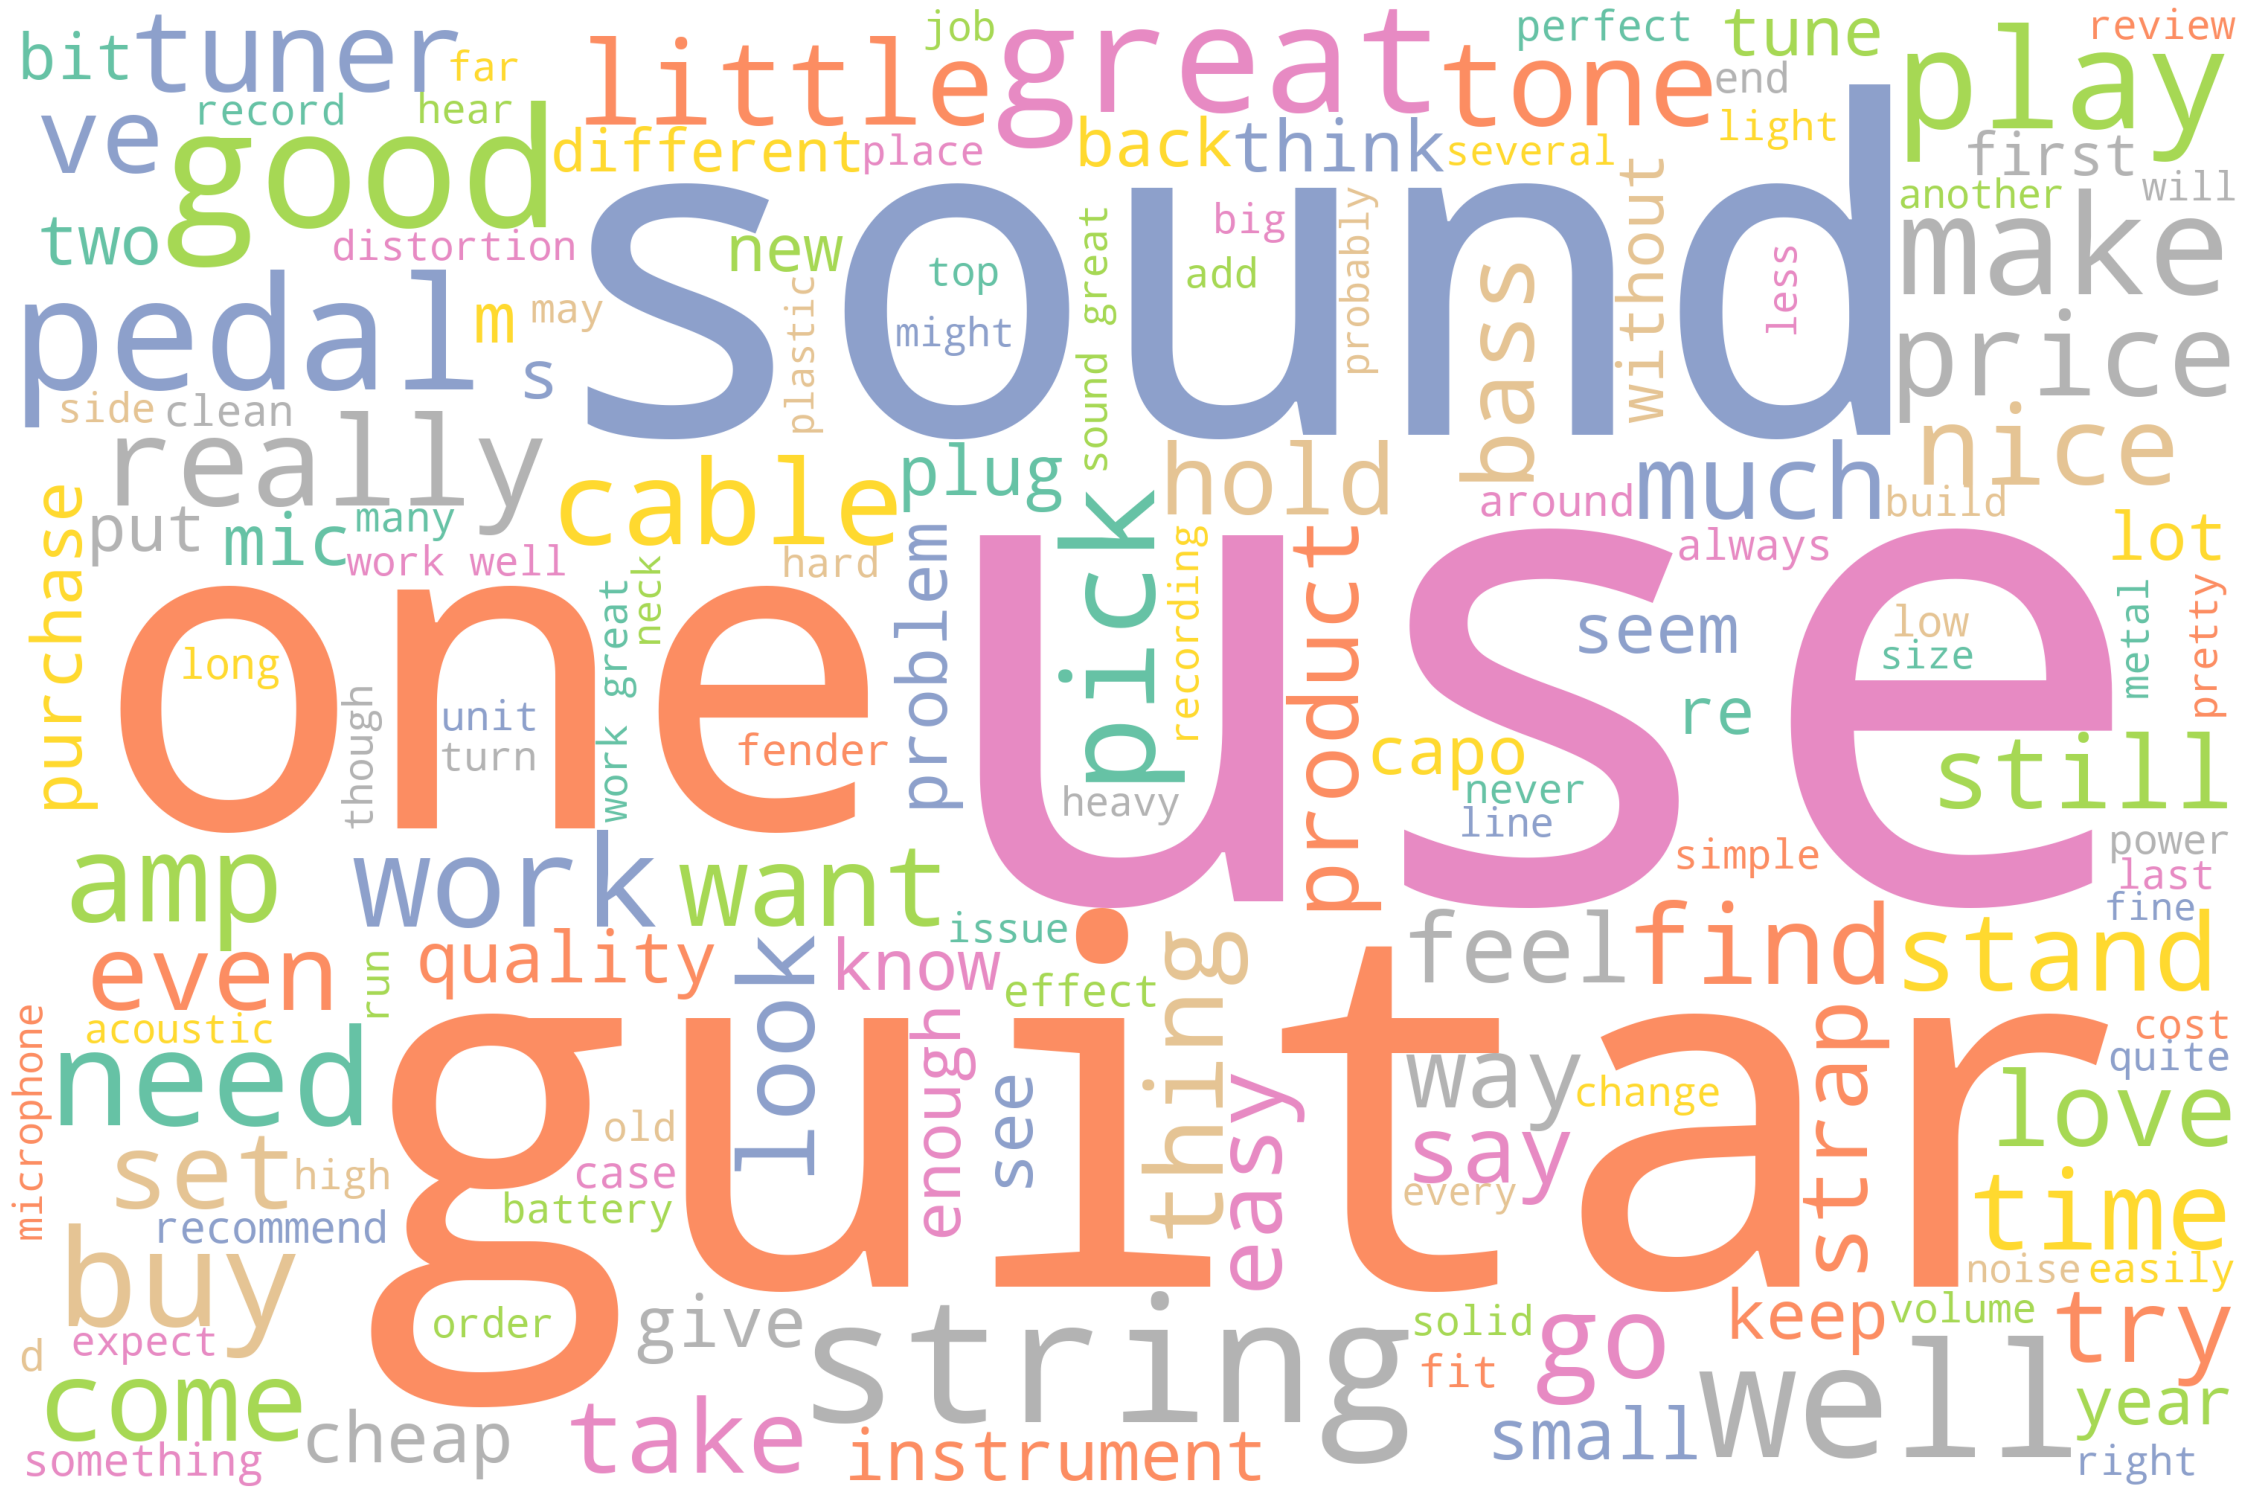

In [98]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=150,colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [101]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [103]:
for token in doc_block[100:500]:
    print(token,token.pos_)

m VERB
glad ADJ
buy VERB
its PRON
basically ADV
top ADJ
end NOUN
2 NUM
second ADJ
delay NOUN
whistle ADJ
bell NOUN
would AUX
not PART
even ADV
think VERB
would AUX
alot ADV
delay VERB
pedal NOUN
thing NOUN
limitless ADJ
except SCONJ
2 NUM
second ADJ
loop NOUN
capability NOUN
sound NOUN
like ADP
original ADJ
enough ADV
say VERB
great ADJ
pedal NOUN
still ADV
build VERB
like ADP
tank NOUN
appreciate VERB
version NOUN
one NUM
use VERB
pretty ADJ
standard ADJ
ac PROPN
adapter PROPN
buy VERB
two NUM
band NOUN
fantastic ADJ
grant NOUN
hercules NOUN
stand VERB
use VERB
work NOUN
two NUM
singer NOUN
great ADJ
quality NOUN
would AUX
definitely ADV
buy VERB
if SCONJ
want VERB
u2 NOUN
kind NOUN
sound VERB
good ADJ
entry NOUN
type NOUN
sound NOUN
thing NOUN
do AUX
not PART
like VERB
pop VERB
sound NOUN
tunr NOUN
time NOUN
knob NOUN
for ADP
price NOUN
home NOUN
use NOUN
good ADJ
pedal NOUN
someone PRON
budget VERB
this DET
amp NOUN
awesome NOUN
its PRON
great ADJ
just ADV
like ADP
advertised ADJ
pl

In [104]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:500])

['knob', 'price', 'home', 'use', 'pedal', 'budget', 'amp', 'awesome', 'play', 'metal', 'side', 'manage', 'make', 'distortion', 'use', 'fender', 'use', 'get', 'hang', 'get', 'detail', 'setting', 'get', 'tone', 'desire', 'amp', 'preset', 'advertise', 'show', 'color', 'customize', 'want', 'distortion', 'go', 'thing', 'come', 'version', 'program', 'look', 'learn', 'use', 'record', 'music', 'save', 'bummer', 'know', 'give', 'allow', 'save', 'recording', 'thing', 'purchase', 'button', 'foot', 'pedal', 'use', 'button', 'foot', 'pedal', 'foot', 'pedal', 'use', 'button', 'use', 'fender', 'remember', 'price', 'pop', 'filter', 'clamp', 'stand', 'move', 'place', 'problem', 'lose', 'grip', 'arm', 'hold', 'filter', 'mean', 'pick', 'arm', 'swivel', 'grant', 'drop', 'price', 'get', 'filter', 'work', 'bass', 'inch', 'speaker', 'bass', 'jazz', 'love', 'tone', 'amp', 'plug', 'boy', 'bring', 'life', 'live', 'bass', 'preamp', 'bass', 'player', 'dial', 'ton', 'tone', 'give', 'amp', 'tubelike', 'sound', 'bon

In [105]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:50]

word  count
0          use    790
1        sound    540
2       guitar    538
3       string    468
4        pedal    422
5          get    421
6         work    419
7         make    341
8         play    308
9          buy    280
10       price    249
11        pick    235
12        time    214
13        need    214
14          go    207
15        tone    200
16       cable    200
17         amp    194
18       stand    193
19        look    186
20     quality    179
21        want    174
22        come    174
23        find    170
24       tuner    161
25         try    156
26   recommend    153
27       thing    151
28     product    149
29       strap    139
30         set    138
31        take    137
32        give    135
33        love    133
34        year    130
35        hold    127
36         way    125
37        feel    125
38         say    119
39        tune    117
40       think    116
41     problem    115
42        seem    113
43  instrument    110
44        know    109
45    purchase    108
46         see    104
47         bit    103
48         lot    103
49         put    103

<AxesSubplot:title={'center':'Top 30 nouns and verbs'}, xlabel='word'>

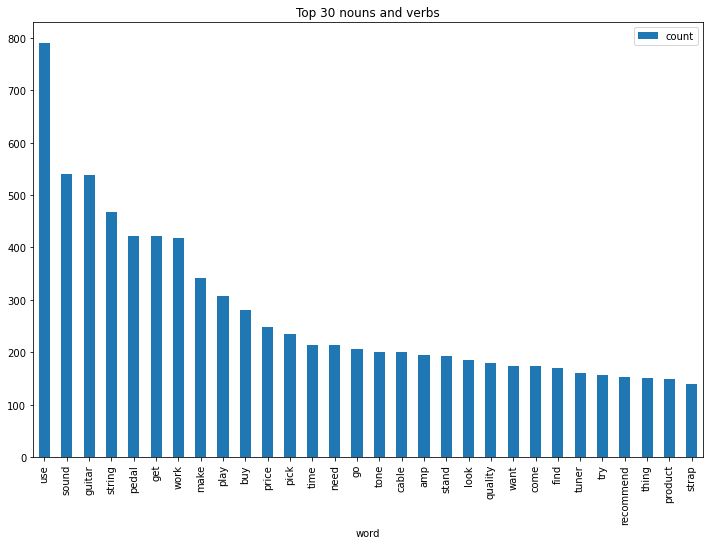

In [106]:
# Visualizing results (Barchart for nouns + verbs)
wd_df[0:30].plot.bar(x='word',figsize=(12,8),title='Top 30 nouns and verbs')

# Emotion Mining - Sentiment Analysis

In [109]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))
sentences

['Planet Waves makes good stuff.',
 'Take the load off your shoulder from that old Jazz bass, and get a padded 3 inch wide strap.',
 "It's long enough to allow my bass to rest at arm's length.",
 "I can adjust it to fit my acoustic guitar, which I hold much higher, and check out the little 'pick-pocket'.",
 'I like these well enough that I have four of them.',
 'Overall dimensions 6 3/4" x 6 1/2" x 2 1/4".',
 'Very nice travel size.',
 'Sound is about what you would expect.',
 'It is basically a toy.',
 'If you use more than 2 (of 10 max) gain, it sounds awful.',
 'I turn guitar volume to max and adjust volume on the amp to desired level.',
 'Tone works nicely to filter the output over all frequencies.',
 'I am using it with a Fender Starcaster when I travel for work (hotel friendly).',
 "I think it's over priced but I think it looks good and it seems durable.",
 "I've had this for 4 days and I'm so glad I bought it.",
 "Its basically a top end 2 second delay with whistles and bells yo

In [110]:
sentence_df=pd.DataFrame(sentences,columns=['Sentence'])
sentence_df

Sentence
0                        Planet Waves makes good stuff.
1     Take the load off your shoulder from that old ...
2     It's long enough to allow my bass to rest at a...
3     I can adjust it to fit my acoustic guitar, whi...
4     I like these well enough that I have four of t...
...                                                 ...
5849  I use it mostly as a clean boost so the pedal ...
5850   I leave it plugged in on the board all the time.
5851  I reach down and use my hand to turn it on and...
5852                          I carry a backup pedal...
5853    I LOVE THIS PEDAL!...just don't ever drop it...

[5854 rows x 1 columns]

In [112]:
# Emotion Lexicon - Affin
afinn=pd.read_csv('/users/rahulkp/downloads/Afinn.csv',sep=',',encoding='Latin-1')
afinn

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [113]:
afinnity_scores=afinn.set_index('word')['value'].to_dict()
afinnity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [114]:
# Custom function: store each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=afinnity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [115]:
# Manually checking
calculate_sentiment(text='good product')

3

In [117]:
# Calculating sentiment value for each sentence
sentence_df['sentiment_value']=sentence_df['Sentence'].apply(calculate_sentiment)
sentence_df['sentiment_value']

0       3
1       0
2       1
3       1
4       2
       ..
5849    3
5850   -1
5851    1
5852    0
5853    2
Name: sentiment_value, Length: 5854, dtype: int64

In [118]:
sentence_df['Word_Count']=sentence_df['Sentence'].str.split().apply(len)
sentence_df['Word_Count']

0        5
1       19
2       12
3       20
4       11
        ..
5849    24
5850    11
5851    13
5852     5
5853     8
Name: Word_Count, Length: 5854, dtype: int64

In [119]:
sentence_df

Sentence  sentiment_value  \
0                        Planet Waves makes good stuff.                3   
1     Take the load off your shoulder from that old ...                0   
2     It's long enough to allow my bass to rest at a...                1   
3     I can adjust it to fit my acoustic guitar, whi...                1   
4     I like these well enough that I have four of t...                2   
...                                                 ...              ...   
5849  I use it mostly as a clean boost so the pedal ...                3   
5850   I leave it plugged in on the board all the time.               -1   
5851  I reach down and use my hand to turn it on and...                1   
5852                          I carry a backup pedal...                0   
5853    I LOVE THIS PEDAL!...just don't ever drop it...                2   

      Word_Count  
0              5  
1             19  
2             12  
3             20  
4             11  
...          ...  
5849          24  
5850          11  
5851          13  
5852           5  
5853           8  

[5854 rows x 3 columns]

In [124]:
sentence_df[0:5]

Sentence  sentiment_value  \
0                     Planet Waves makes good stuff.                3   
1  Take the load off your shoulder from that old ...                0   
2  It's long enough to allow my bass to rest at a...                1   
3  I can adjust it to fit my acoustic guitar, whi...                1   
4  I like these well enough that I have four of t...                2   

   Word_Count  
0           5  
1          19  
2          12  
3          20  
4          11

In [120]:
sentence_df.sort_values(by='sentiment_value')

Sentence  sentiment_value  \
791   Sturdy and stable and I need more words so I c...               -6   
1380  When you use a guitar stand you can't afford t...               -6   
5472  I haven't picked up a guitar in 15 years, but ...               -6   
1312  Often though, the signal is to hot, the music ...               -5   
5824  Don't get me wrong -- I am a die-hard Fenderis...               -5   
...                                                 ...              ...   
3302  The Boss DD-7 was perfectly clean and did not ...               18   
4835  This capo is beautiful,  It is clean with an e...               19   
4052  Like a good guitar that is well cared for, thi...               20   
1905  have been playing finger style only - usually ...               24   
999   Great great great great great great great grea...               27   

      Word_Count  
791           56  
1380          39  
5472          50  
1312          17  
5824          25  
...          ...  
3302          91  
4835          74  
4052          65  
1905         216  
999            9  

[5854 rows x 3 columns]

In [121]:
sentence_df['sentiment_value'].describe()

count    5854.000000
mean        1.414076
std         2.479724
min        -6.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        27.000000
Name: sentiment_value, dtype: float64

In [122]:
sentence_df[sentence_df['sentiment_value']<=0]

Sentence  sentiment_value  \
1     Take the load off your shoulder from that old ...                0   
5          Overall dimensions 6 3/4" x 6 1/2" x 2 1/4".                0   
7                 Sound is about what you would expect.                0   
8                                It is basically a toy.                0   
9     If you use more than 2 (of 10 max) gain, it so...               -1   
...                                                 ...              ...   
5843  If your looking to play out with it know that ...               -3   
5844                                     Have a backup.                0   
5846  That alone can cause problems... As far as ton...               -4   
5850   I leave it plugged in on the board all the time.               -1   
5852                          I carry a backup pedal...                0   

      Word_Count  
1             19  
5             10  
7              7  
8              5  
9             13  
...          ...  
5843          19  
5844           3  
5846          19  
5850          11  
5852           5  

[2829 rows x 3 columns]

In [123]:
sentence_df[sentence_df['sentiment_value']>0]

Sentence  sentiment_value  \
0                        Planet Waves makes good stuff.                3   
2     It's long enough to allow my bass to rest at a...                1   
3     I can adjust it to fit my acoustic guitar, whi...                1   
4     I like these well enough that I have four of t...                2   
6                                Very nice travel size.                3   
...                                                 ...              ...   
5847  You can go from clean to outright mean with th...                2   
5848  It has out muscled my 2 other more expensive n...                1   
5849  I use it mostly as a clean boost so the pedal ...                3   
5851  I reach down and use my hand to turn it on and...                1   
5853    I LOVE THIS PEDAL!...just don't ever drop it...                2   

      Word_Count  
0              5  
2             12  
3             20  
4             11  
6              4  
...          ...  
5847          11  
5848          24  
5849          24  
5851          13  
5853           8  

[3025 rows x 3 columns]

/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

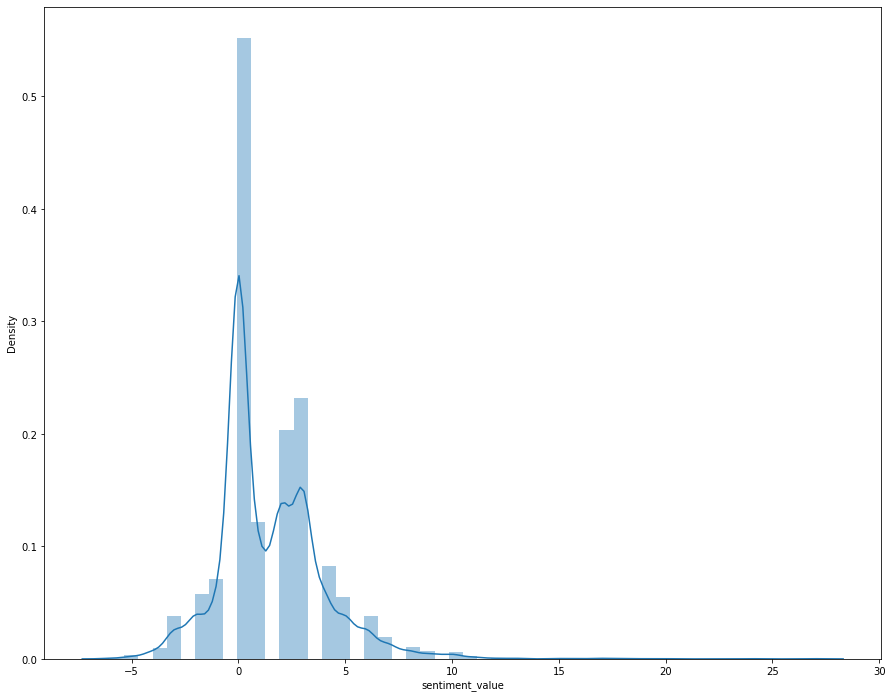

In [125]:
plt.figure(figsize=(15,12))
sns.distplot(sentence_df['sentiment_value'])

In the above plotted graph,

the plot is more dominant on to the RIGHT SIDE means the sentiment value with the positive scores are more 

Whatever the product we are reviewing here , we can conclude that the customers feedback about the product are on POSITIVE SIDE